# Progetto Python


In [1]:
import pandas as pd

In [ ]:
import os

In [ ]:
os.getcwd()

In [2]:
#carichiamo i dati degli annunci
df_listings = pd.read_csv('/Users/ivano/Documents/listings.csv')

In [134]:
print(df_listings)

                       id                                               name  \
0                 5678774                                 Central Appartment   
2                 6139798                              Affitto casa per Expo   
3                 7479570                  Central Air-Conditioned Apartment   
4                 8438872                            Bedroom for the weekend   
5                10609449                                        LUXURY FLAT   
...                   ...                                                ...   
20364             4845413                 Bed & Breakfast Milanobrera Relais   
20365  637425034363201358    Appartamento centro storico, navigli, ticinese.   
20366            40817739             Nuvola Suite - 900mt from Duomo Square   
20367  592550481216316403                              Abbadesse - Abbadesse   
20368            10150665  SWEET HOME SAN LORENZO, 2 BDR, 2 BTH, CITY CENTER   

                                       

In [ ]:
df_listings.dtypes

In [3]:
#carichiamo i dati delle recensioni
df_reviews = pd.read_csv('/Users/ivano/Documents/reviews.csv')

In [135]:
print(df_reviews)

                listing_id                  id        date  reviewer_id  \
0                     6400               36772  2010-04-19        94463   
1                     6400              227727  2011-04-16       415910   
2                     6400             1162608  2012-04-22       415910   
3                     6400            11670681  2014-04-11      8464658   
4                     6400            11780336  2014-04-14      5427294   
...                    ...                 ...         ...          ...   
611799  838184897759433339  847722747234842814  2023-03-15     46351960   
611800  838188511130316229  846976029055875390  2023-03-14    205576010   
611801  838266422550245358  840401357243960792  2023-03-05    424155005   
611802  838266422550245358  843313780914723751  2023-03-09    388259970   
611803  838266422550245358  844755620276373651  2023-03-11    186023564   

       reviewer_name                                           comments  
0               Hyun  I h

In [ ]:
print(df_reviews.dtypes)

In [5]:
# Calcola il numero di recensioni per ogni annuncio, può essere una buona proxy per il successo di un annuncio
df_nreviews = df_reviews.groupby('listing_id').size().reset_index(name='n_reviews')

In [ ]:
print(df_nreviews)

In [6]:
df_nreviews2 = df_nreviews.rename(columns={'listing_id': 'id'})

In [ ]:
print(df_nreviews2)

In [7]:
# Combina i dati degli annunci con il numero di prenotazioni
df_listings = pd.merge(df_listings, df_nreviews2, on='id', how='left')

In [8]:
def convert_to_int(value):
    try:
        result = int(value)
    except (ValueError, TypeError):
        result = 0
    return result

In [9]:
df_listings['n_reviews'] = df_listings['n_reviews'].apply(convert_to_int)

In [ ]:
df_listings['n_reviews'].dtypes

In [ ]:
print(df_listings['n_reviews'])

In [ ]:
df_listings['price'].dtypes

In [10]:
df_listings['price'] = df_listings['price'].replace({'\$': ''}, regex=True).astype(str)

In [11]:
df_listings['price'] = df_listings['price'].str.replace(',', '').astype(float)

In [ ]:
df_listings['price'].dtypes

In [ ]:
df_listings['description'] = df_listings['description'].astype(str)

In [ ]:
df_listings['len_description'] = df_listings['description'].apply(lambda x : len(str(x)))

In [12]:
df_listings[['host_location', 'id', 'latitude', 'longitude']]

,host_location,id,latitude,longitude
0,"Milan, Italy",5678774,45.452340,9.174740
1,"Milan, Italy",5625937,45.460010,9.185820
2,NaN,6139798,45.512520,9.130460
3,"Rome, Italy",7479570,45.456200,9.201310
4,"Milan, Italy",8438872,45.495470,9.207160
...,...,...,...,...
20365,"Milan, Italy",637425034363201358,45.457314,9.180191
20366,"Milan, Italy",40817739,45.458340,9.179450
20367,"Milan, Italy",592550481216316403,45.492150,9.193410
20368,NaN,10150665,45.460520,9.180800


In [13]:
#eliminiamo le colonne di cui non ci serviremo
df_listings = df_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url','host_name','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated' ], axis=1)

In [ ]:
df_listings

In [14]:
import matplotlib.pyplot as plt

In [ ]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_listings['price'])
plt.tight_layout()
plt.show()

In [15]:
from scipy import stats

In [ ]:
Q1 = df_listings['price'].quantile(0.25)
Q3 = df_listings['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_listings = df_listings[(df_listings['price'] >= lower_bound) & (df_listings['price'] <= upper_bound)]


In [ ]:
df_listings

In [ ]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_listings['price'])
plt.tight_layout()
plt.show()

In [22]:
df_success = df_listings[(df_listings['n_reviews'] >= 50)&(df_listings['availability_30'] <= 10)]

In [ ]:
print(df_success)

In [23]:
df_listings = pd.merge(df_listings, df_success['id'], on='id', how='outer', suffixes=('_listings', '_success'), indicator=True)
df_listings = df_listings[df_listings['_merge'] == 'left_only']
df_listings = df_listings.drop('_merge', axis=1)

In [ ]:
meanprice_success = df_success['price'].mean()
stdprice_success = df_success['price'].std()
meanprice_listings = df_listings['price'].mean()
stdprice_listings = df_listings['price'].std()

In [ ]:
t, p = stats.ttest_ind_from_stats(mean1=meanprice_success, std1=stdprice_success, nobs1=len(df_success),
                                  mean2=meanprice_listings, std2=stdprice_listings, nobs2=len(df_listings))


In [ ]:
if p < 0.05:
    print("La differenza tra le medie dei prezzi è significativa")
else:
    print("La differenza tra le medie dei prezzi non è significativa")

In [ ]:
meanprice_success

In [ ]:
meanprice_listings

In [ ]:
stdprice_success

In [ ]:
stdprice_listings

In [ ]:
meanlendes_success = df_success['len_description'].mean()
stdlendes_success = df_success['len_description'].std()
meanlendes_listings = df_listings['len_description'].mean()
stdlendes_listings = df_listings['len_description'].std()

In [ ]:
tlen, plen = stats.ttest_ind_from_stats(mean1=meanprice_success, std1=stdprice_success, nobs1=len(df_success),
                                  mean2=meanprice_listings, std2=stdprice_listings, nobs2=len(df_listings))


In [ ]:
if plen < 0.05:
    print("La differenza tra le medie della lunghezza delle descrizioni è significativa")
else:
    print("La differenza tra le medie della lunghezza delle descrizioni non è significativa")

In [ ]:
meanlendes_success

In [ ]:
meanlendes_listings

In [ ]:
stdlendes_success

In [ ]:
stdlendes_listings

In [16]:
import pandas as pd

In [ ]:
all_words = ' '.join(df_success['description'].astype(str).tolist())

In [ ]:
all_words

In [ ]:
def word_count(df, col_name):
    # Uniamo tutte le parole in una stringa unica
    all_words = ' '.join(df[col_name].astype(str).tolist())
   # Rimuove la punteggiatura e le cifre
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)

    # Converti il testo in una lista di parole
    words = text.split()

    # Conta le ricorrenze di ogni parola
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

In [ ]:
word_success_description = word_count(df_success, description)

GEOLOCALIZZAZIONE

In [ ]:
pip install pandas-geojson

In [ ]:
pip install geopandas

In [17]:
from pandas_geojson import read_geojson
geo_json = read_geojson('/Users/ivano/Documents/neighbourhoods.geojson')

In [18]:
df_neigh = pd.read_csv('/Users/ivano/Documents/neighbourhoods.csv')

In [19]:
import geopandas as gps

In [20]:
milan_gps = gps.read_file('/Users/ivano/Documents/neighbourhoods.geojson')

In [136]:
milan_gps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        88 non-null     object  
 1   neighbourhood_group  0 non-null      float64 
 2   geometry             88 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.2+ KB


<AxesSubplot:>

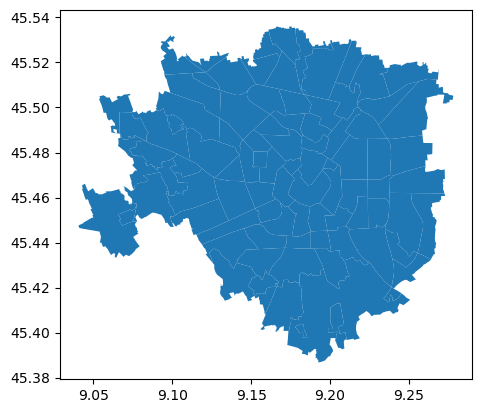

In [137]:
milan_gps.plot()

In [138]:
milan_gps['geometry']

0     MULTIPOLYGON (((9.12195 45.51602, 9.12163 45.5...
1     MULTIPOLYGON (((9.16887 45.52396, 9.16803 45.5...
2     MULTIPOLYGON (((9.12932 45.50998, 9.12973 45.5...
3     MULTIPOLYGON (((9.14368 45.48474, 9.14338 45.4...
4     MULTIPOLYGON (((9.23739 45.45588, 9.23731 45.4...
                            ...                        
83    MULTIPOLYGON (((9.09998 45.48789, 9.10146 45.4...
84    MULTIPOLYGON (((9.21002 45.44739, 9.21018 45.4...
85    MULTIPOLYGON (((9.15266 45.41520, 9.15200 45.4...
86    MULTIPOLYGON (((9.16506 45.46684, 9.16486 45.4...
87    MULTIPOLYGON (((9.19871 45.48484, 9.19836 45.4...
Name: geometry, Length: 88, dtype: geometry

In [139]:
milan_gps.centroid

C:\Users\ivano\AppData\Local\Temp\ipykernel_4360\639869370.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  milan_gps.centroid


0     POINT (9.12275 45.52025)
1     POINT (9.15998 45.52646)
2     POINT (9.12139 45.51225)
3     POINT (9.13630 45.48733)
4     POINT (9.23027 45.45342)
                ...           
83    POINT (9.08574 45.48470)
84    POINT (9.20514 45.45040)
85    POINT (9.14199 45.42333)
86    POINT (9.16286 45.47354)
87    POINT (9.19058 45.48359)
Length: 88, dtype: geometry

In [24]:
geo_success = df_success[['id', 'latitude', 'longitude']]

In [140]:
geo_success

,id,latitude,longitude
0,5625937,45.46001,9.18582
1,206450,45.45238,9.20745
2,26374075,45.49226,9.22463
3,4123599,45.46024,9.18091
4,2759420,45.48264,9.18543
...,...,...,...
2160,3816798,45.47167,9.23089
2161,17899097,45.46499,9.22995
2162,3725671,45.47641,9.18230
2163,45512683,45.48123,9.17672


In [ ]:
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')

In [25]:
df_listings[['id', 'latitude', 'longitude']]

,id,latitude,longitude
0,5678774,45.452340,9.174740
2,6139798,45.512520,9.130460
3,7479570,45.456200,9.201310
4,8438872,45.495470,9.207160
5,10609449,45.448450,9.181160
...,...,...,...
20364,4845413,45.476990,9.182210
20365,637425034363201358,45.457314,9.180191
20366,40817739,45.458340,9.179450
20367,592550481216316403,45.492150,9.193410


In [26]:
geo_unsuccess = df_listings[['id', 'latitude', 'longitude']]

In [ ]:
geo_success

In [ ]:
geo_unsuccess

In [ ]:
geo_unsuccess.info()

In [ ]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')

<AxesSubplot:>

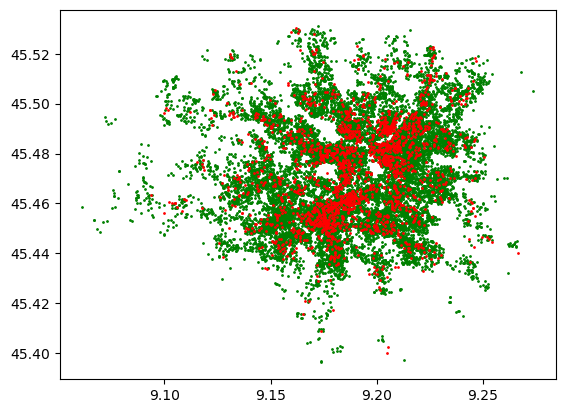

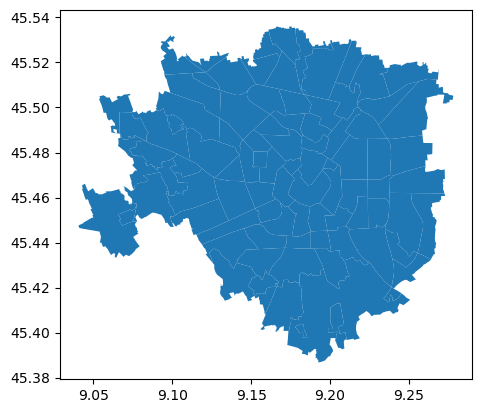

In [141]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')
milan_gps.plot()

In [ ]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')

In [27]:
df_metro = pd.read_json(r'C:/Users/ivano/documenti/metromilano.json')

In [142]:
df_metro.head()

,ID,FERMATA,N_ARCHI,latitude,longitude
0,2,GESSATE,1,45.546128,9.437564
1,4,ZARA,2,45.492662,9.192703
2,5,S.DONATO,1,45.430214,9.256324
3,6,MACIACHINI,2,45.497771,9.184904
4,8,MOLINO DORINO,2,45.505079,9.093327


In [28]:
df_metro.rename(columns={'DO_Y':'latitude', 'DO_X':'longitude'}, inplace=True)

In [29]:
geo_metro = df_metro.drop(['ID', 'N_ARCHI'], axis=1)

In [50]:
geo_metro

,FERMATA,latitude,longitude
0,GESSATE,45.546128,9.437564
1,ZARA,45.492662,9.192703
2,S.DONATO,45.430214,9.256324
3,MACIACHINI,45.497771,9.184904
4,MOLINO DORINO,45.505079,9.093327
...,...,...,...
88,COMASINA,45.531556,9.161898
89,AFFORI NORD,45.522379,9.167983
90,AFFORI CENTRO,45.512880,9.174410
91,DERGANO,45.505225,9.179710


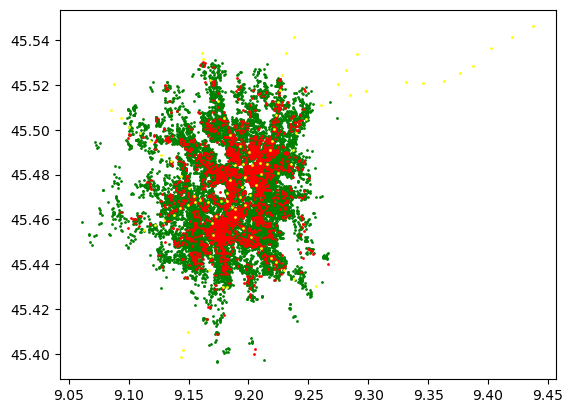

In [143]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')
plt.scatter(geo_metro['longitude'],geo_metro['latitude'], s = 1, c = 'yellow')

togliere fermate metro al di fuori del centro di milano

In [30]:
import numpy as np

In [31]:
from numpy import sin, cos, arccos, pi, round

In [32]:
##funzioni in generale per trovare distanza date 2 coordinate terrestri

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def distanza(latitude1, longitude1, latitude2, longitude2):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    return round(distance * 1609.344, 2) ##distanza in metri con due decimali 

In [33]:
distanza(geo_success['latitude'][1], geo_success['longitude'][1],geo_metro['latitude'][1], geo_metro['longitude'][1])

3670.06

In [34]:
geo_metro.loc[6]['latitude']

45.5244791938931

In [48]:
i = 17

In [49]:
distanza(geo_success.loc[i]['latitude'], geo_success.loc[i]['longitude'],
         geo_metro.loc[i]['latitude'], geo_metro.loc[i]['longitude'])

20972.43

In [43]:
geo_success

,id,latitude,longitude
0,5625937,45.46001,9.18582
1,206450,45.45238,9.20745
2,26374075,45.49226,9.22463
3,4123599,45.46024,9.18091
4,2759420,45.48264,9.18543
...,...,...,...
2160,3816798,45.47167,9.23089
2161,17899097,45.46499,9.22995
2162,3725671,45.47641,9.18230
2163,45512683,45.48123,9.17672


In [ ]:
geo_metro.loc[5]

geo_success ha gli indici sfalsati, per quello da errore per alcuni indici,
soluzioni: - si ridanno tutti gli indici (magari con un for/range), si cambia la funzione in modo che se non trovo un indice 
passa a quello successivo


sistemato questo, doppio ciclo for (1 per geo_success, 1 per geo_metro) per valutare tutte le distanze e mettere i risultati
in un altro dataframe (????)

In [39]:
geo_success.reset_index(inplace=True)
geo_success.drop(['index'], axis=1, inplace=True)

In [87]:
min_dis_success = []

In [88]:
#tempo di esecuzione circa 2/3 minuti
for i in range (2165):
    min_dis = float('inf')
    for h in range (93):
        dis = distanza(geo_success.loc[i]['latitude'], geo_success.loc[i]['longitude'],
         geo_metro.loc[h]['latitude'], geo_metro.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_success.append(min_dis)

In [101]:
geo_unsuccess

,id,latitude,longitude
0,5678774,45.452340,9.174740
1,6139798,45.512520,9.130460
2,7479570,45.456200,9.201310
3,8438872,45.495470,9.207160
4,10609449,45.448450,9.181160
...,...,...,...
18200,4845413,45.476990,9.182210
18201,637425034363201358,45.457314,9.180191
18202,40817739,45.458340,9.179450
18203,592550481216316403,45.492150,9.193410


In [100]:
geo_unsuccess.reset_index(inplace=True)
geo_unsuccess.drop(['index'], axis=1, inplace=True)

C:\Users\ivano\AppData\Local\Temp\ipykernel_4360\1256151165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_unsuccess.drop(['index'], axis=1, inplace=True)


In [102]:
min_dis_unsuccess = []

In [103]:
#tempo di esecuzione circa 10/15 minuti
for i in range (18205):
    min_dis = float('inf')
    for h in range (93):
        dis = distanza(geo_unsuccess.loc[i]['latitude'], geo_unsuccess.loc[i]['longitude'],
         geo_metro.loc[h]['latitude'], geo_metro.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_unsuccess.append(min_dis)

In [106]:
min_dis_unsuccess[:10]

[374.19,
 2179.48,
 431.04,
 794.97,
 1003.67,
 648.2,
 854.46,
 288.61,
 719.83,
 700.01]

In [77]:
import statistics

In [107]:
mean_succ = statistics.mean(min_dis_success)

In [108]:
mean_succ

570.124572748268

In [109]:
geo_mean_succ = np.mean(min_dis_success)
geo_mean_succ

570.1245727482678

In [110]:
std_succ = np.std(min_dis_success)

In [111]:
std_succ

456.348810321666

In [94]:
np.min(min_dis_success)

7.62

In [95]:
np.max(min_dis_success)

3776.33

In [112]:
mean_unsucc = np.mean(min_dis_unsuccess)

In [113]:
mean_unsucc

682.329621532546

In [114]:
std_unsucc = np.std(min_dis_unsuccess)
std_unsucc

510.74879232127176

In [115]:
np.min(min_dis_unsuccess)

1.48

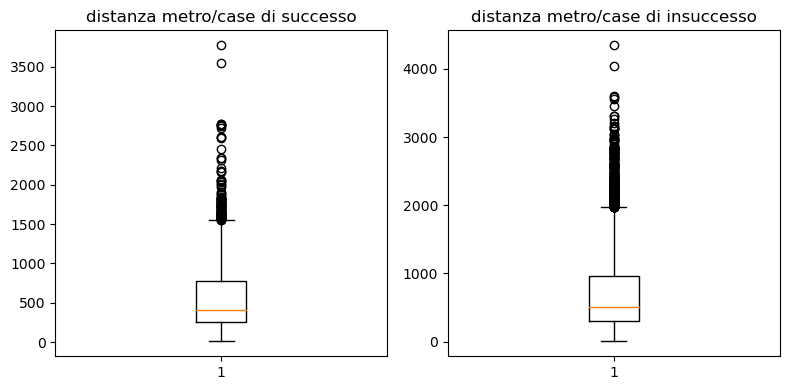

In [133]:
fig, (axs, axu) = plt.subplots(figsize=(8,4), ncols=2)
axs.boxplot(min_dis_success)
axs.set_title("distanza metro/case di successo")
axu.boxplot(min_dis_unsuccess)
axu.set_title("distanza metro/case di insuccesso")
plt.tight_layout()
plt.show()